In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import pandas_profiling as pp

from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Regressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [54]:
filename='2021_LoL_esports_match_data_from_OraclesElixir_20221108.csv'
data=pd.read_csv(filename)

data.head()



,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,118.0,748.0,-56.0,-4.0,2.0,0.0,1.0,0.0,1.0,1.0
1,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,84.0,2120.0,3405.0,62.0,3.0,2.0,0.0,2.0,0.0,3.0
2,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,143.0,1578.0,354.0,15.0,2.0,3.0,0.0,0.0,0.0,0.0
3,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,120.0,124.0,102.0,10.0,0.0,4.0,2.0,1.0,1.0,2.0
4,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,25.0,448.0,450.0,3.0,1.0,4.0,0.0,0.0,2.0,2.0


In [67]:
#cleaning data
df=data[['goldat15','xpat15','csat15','killsat15','barons']].copy()

df.dropna(axis=0,how='any',inplace=True)
df.info()
index_names=df[df['barons']>1].index
df.drop(index_names,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38182 entries, 10 to 150263
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   goldat15   38182 non-null  float64
 1   xpat15     38182 non-null  float64
 2   csat15     38182 non-null  float64
 3   killsat15  38182 non-null  float64
 4   barons     38182 non-null  float64
dtypes: float64(5)
memory usage: 1.7 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35114 entries, 10 to 150263
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   goldat15   35114 non-null  float64
 1   xpat15     35114 non-null  float64
 2   csat15     35114 non-null  float64
 3   killsat15  35114 non-null  float64
 4   barons     35114 non-null  float64
dtypes: float64(5)
memory usage: 1.6 MB


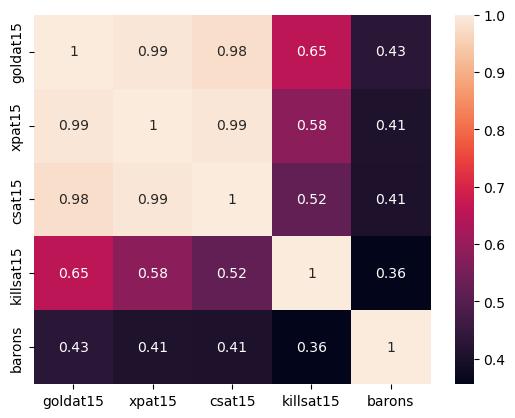

In [68]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[5602, 1669],
       [1560, 1704]])

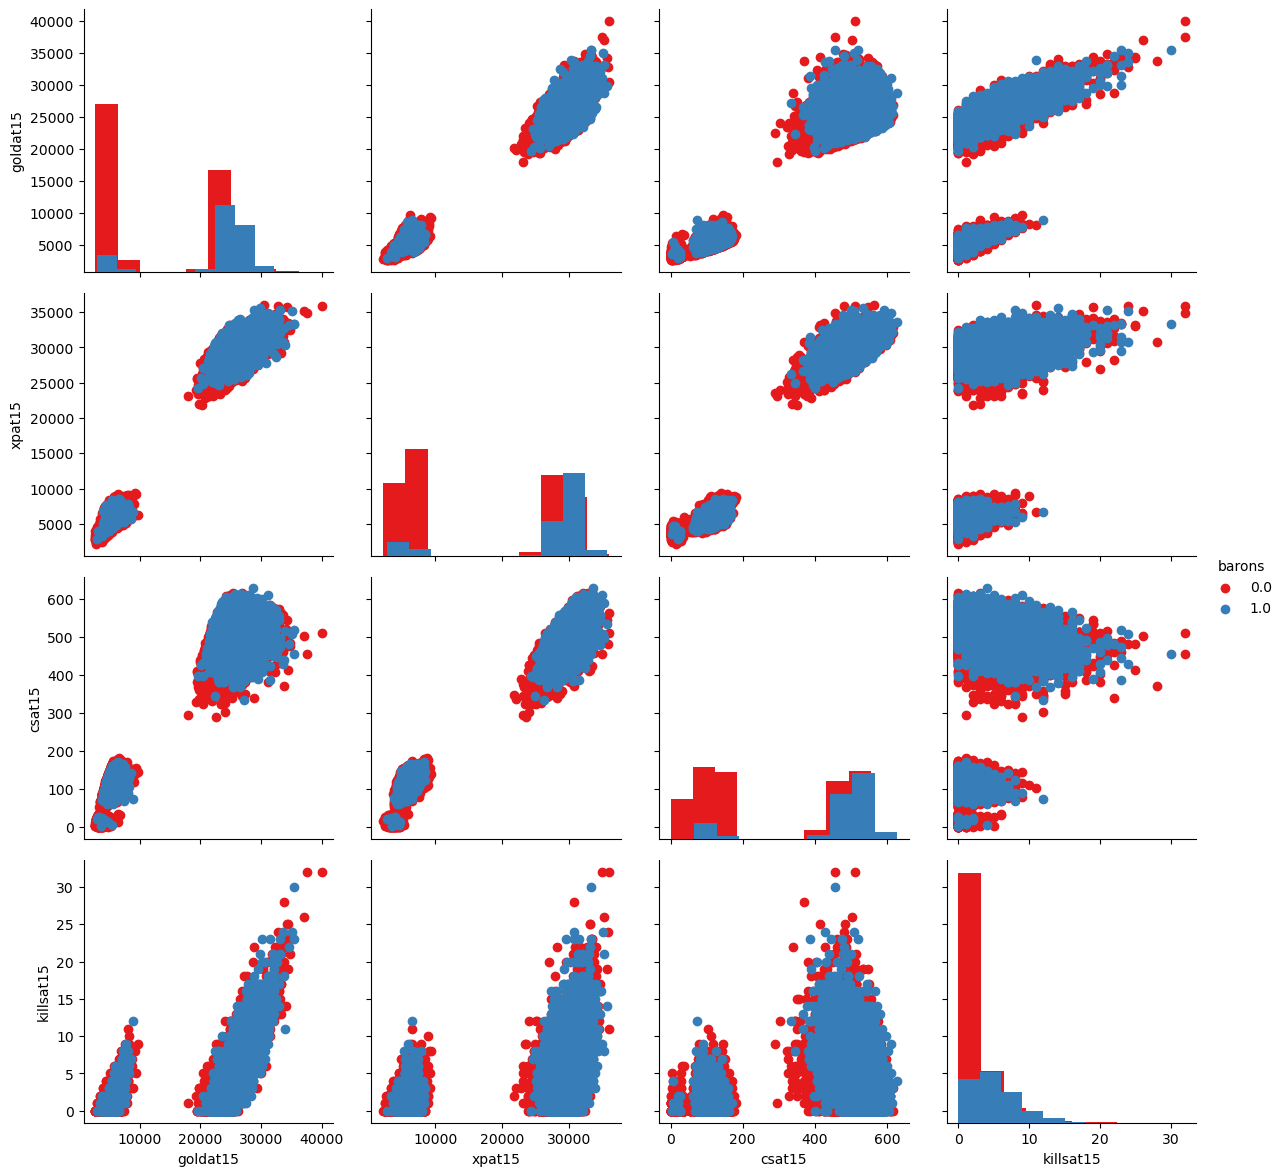

In [70]:
#checking relationship between the 4 features and baron
g = sns.PairGrid(data=df, vars=['goldat15','xpat15','csat15','killsat15'],
             hue='barons',height=3,palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()
 

In [75]:
#splitting dataset 

X=df.drop(['barons'],axis=1)
X=X.dropna(axis=0,how='any')
y=df[['barons']]
y=y.dropna(axis=0,how='any')

print(X.shape)
print(y.shape)

(35114, 4)
(35114, 1)


In [78]:
#fitting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) 
tree=DecisionTreeClassifier()
model=tree.fit(X_train,y_train)




In [79]:
y_pred=model.predict(X_test)
print(y_pred)

print(y_test)

[0. 0. 0. ... 0. 1. 1.]
        barons
129511     0.0
144453     0.0
107183     1.0
130561     0.0
126160     0.0
...        ...
110915     1.0
127327     0.0
41975      0.0
140867     0.0
65447      0.0

[10535 rows x 1 columns]


In [80]:
len(y_test['barons'].tolist())

10535

In [81]:
len(y_pred)

10535

In [82]:

#model's accuracy score
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))#

              precision    recall  f1-score   support

         0.0       0.78      0.77      0.78      7306
         1.0       0.50      0.51      0.50      3229

    accuracy                           0.69     10535
   macro avg       0.64      0.64      0.64     10535
weighted avg       0.69      0.69      0.69     10535



In [83]:
#splitting dataset 

X=df.drop(['barons'],axis=1)
X=X.dropna(axis=0,how='any')
y=df[['barons']]
y=y.dropna(axis=0,how='any')

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) 
regr=DecisionTreeClassifier()
model=regr.fit(X_train,y_train)

y_pred=model.predict(X_test)



from sklearn.metrics import classification_report
accscore=classification_report(y_test,y_pred)
print(accscore)


              precision    recall  f1-score   support

         0.0       0.78      0.77      0.78      7271
         1.0       0.51      0.52      0.51      3264

    accuracy                           0.69     10535
   macro avg       0.64      0.65      0.64     10535
weighted avg       0.70      0.69      0.69     10535



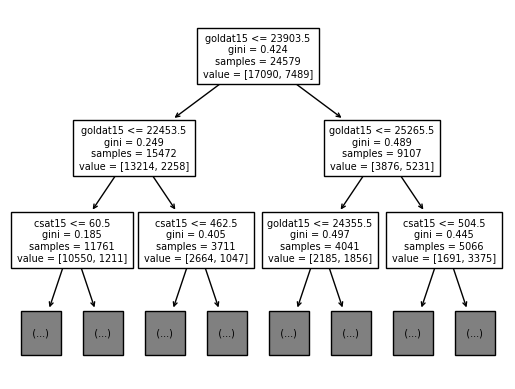

<Figure size 500x500 with 0 Axes>

In [84]:
from sklearn import tree
tree.plot_tree(model,feature_names=['goldat15','xpat15','csat15','killsat15'],
               max_depth=2,fontsize=7)
plt.figure(figsize=(5,5))
plt.show()